In [1]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/SupervisedML/MLB_Pitches/

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/SupervisedML/MLB_Pitches


# Import Data

Data from Kaggle dataset. Measurements from body performance with target class of group of people. Goal of supervised learning is to learn the relationships of these classes and classify new observations (testing set).


https://www.kaggle.com/datasets/pschale/mlb-pitch-data-20152018?select=2019_pitches.csv

In [2]:
# Preprocessing packages
import numpy as np 
from numpy import set_printoptions
import pandas as pd 

# Data Viz packages
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn preprocessing and metrics packages
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

# Sklearn feature selection packages
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

# Sklearn model selection packages
from sklearn import tree
from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# Neural network packages
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from tensorflow.keras.optimizers import SGD

In [3]:
# Data from: https://www.kaggle.com/datasets/pschale/mlb-pitch-data-20152018?select=2019_pitches.csv
data = pd.read_csv('2019_pitches.csv')
data.head()

,px,pz,start_speed,end_speed,spin_rate,spin_dir,break_angle,break_length,break_y,ax,...,event_num,b_score,ab_id,b_count,s_count,outs,pitch_num,on_1b,on_2b,on_3b
0,0.00,2.15,88.8,80.7,placeholder,placeholder,22.8,4.8,24.0,-8.47,...,5,0.0,2.019000e+09,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.34,2.31,89.9,81.8,placeholder,placeholder,22.8,3.6,24.0,-7.10,...,8,0.0,2.019000e+09,0.0,0.0,1.0,1.0,0.0,0.0,0.0
2,-0.05,2.03,85.7,79.6,placeholder,placeholder,9.6,6.0,24.0,3.65,...,9,0.0,2.019000e+09,0.0,0.0,1.0,2.0,0.0,0.0,0.0
3,0.49,0.92,85.4,78.5,placeholder,placeholder,24.0,7.2,24.0,-13.77,...,10,0.0,2.019000e+09,0.0,1.0,1.0,3.0,0.0,0.0,0.0
4,-0.13,1.11,84.6,77.6,placeholder,placeholder,26.4,8.4,24.0,-15.99,...,11,0.0,2.019000e+09,1.0,1.0,1.0,4.0,0.0,0.0,0.0


In [4]:
# Move target variable to first in dataframe
first_column = data.pop('pitch_type')
data.insert(0, 'pitch_type', first_column)

print(f'Training data shape: \n{data.shape}\n')
print(f'Training features: \n{data.columns.to_list()}\n')
print(f'Target (types of pitches): \n{set(data.pitch_type)}')

Training data shape: 
(728790, 40)

Training features: 
['pitch_type', 'px', 'pz', 'start_speed', 'end_speed', 'spin_rate', 'spin_dir', 'break_angle', 'break_length', 'break_y', 'ax', 'ay', 'az', 'sz_bot', 'sz_top', 'type_confidence', 'vx0', 'vy0', 'vz0', 'x', 'x0', 'y', 'y0', 'z0', 'pfx_x', 'pfx_z', 'nasty', 'zone', 'code', 'type', 'event_num', 'b_score', 'ab_id', 'b_count', 's_count', 'outs', 'pitch_num', 'on_1b', 'on_2b', 'on_3b']

Target (types of pitches): 
{'CH', nan, 'KN', 'EP', 'FO', 'FS', 'FC', 'FF', 'SL', 'CU', 'KC', 'FT', 'SI'}


In [5]:
data = data.replace({'pitch_type':{'FT': 'Two-seam Fastball', 
                                   'SL': 'Slider',
                                   'CU': 'Curveball',
                                   'KC': 'Knuckle Curve',
                                   'FF': 'Four-seam Fastball',
                                   'EP': 'Eephus',
                                   'KN': 'Knuckleball',
                                   'FS': 'Splitter',
                                   'FO': 'Pitchout',
                                   'SI': 'Sinker',
                                   'CH': 'Changeup',
                                   'FC': 'Cutter'}})

data.pitch_type

0         Four-seam Fastball
1         Four-seam Fastball
2                     Slider
3                   Changeup
4                   Changeup
                 ...        
728785    Four-seam Fastball
728786                Slider
728787    Four-seam Fastball
728788                Slider
728789                Slider
Name: pitch_type, Length: 728790, dtype: object

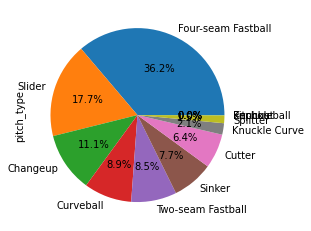

In [ ]:
# Distribution of categories (Target)

data["pitch_type"].value_counts().plot.pie(autopct='%1.1f%%')
plt.gca().set_aspect("equal")

In [ ]:
# Check for null values
data_null = data.isnull().sum()
data_null

pitch_type           6629
px                   6629
pz                   6629
start_speed          6629
end_speed            6629
spin_rate            6629
spin_dir             6629
break_angle          6629
break_length         6629
break_y              6629
ax                   6629
ay                   6629
az                   6629
sz_bot                  0
sz_top                  0
type_confidence      6629
vx0                  6629
vy0                  6629
vz0                  6629
x                       0
x0                   6629
y                       0
y0                   6629
z0                   6629
pfx_x                6629
pfx_z                6629
nasty              728790
zone                 6629
code                    0
type                    0
event_num               0
b_score                 0
ab_id                   0
b_count                 0
s_count                 0
outs                    0
pitch_num               0
on_1b                   0
on_2b       

In [6]:
# Drop irrelevant and sparse columns from dataframe
drop_cols = ['nasty', 'spin_rate', 'spin_dir', 'type_confidence', 'code', 
             'type', 'b_score', 'zone', 'event_num', 'ab_id', 'on_1b', 'on_2b', 
             'on_3b', 'outs', 'y0']

# Convert object types to float
data['x'] = pd.to_numeric(data['x'], errors = 'coerce')
data['y'] = pd.to_numeric(data['y'], errors = 'coerce')

# Remove rows containing NaN values
data = data.drop(columns=drop_cols)
data = data.dropna()

data.shape

(719992, 25)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 719992 entries, 0 to 728789
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   pitch_type    719992 non-null  object 
 1   px            719992 non-null  float64
 2   pz            719992 non-null  float64
 3   start_speed   719992 non-null  float64
 4   end_speed     719992 non-null  float64
 5   break_angle   719992 non-null  float64
 6   break_length  719992 non-null  float64
 7   break_y       719992 non-null  float64
 8   ax            719992 non-null  float64
 9   ay            719992 non-null  float64
 10  az            719992 non-null  float64
 11  sz_bot        719992 non-null  float64
 12  sz_top        719992 non-null  float64
 13  vx0           719992 non-null  float64
 14  vy0           719992 non-null  float64
 15  vz0           719992 non-null  float64
 16  x             719992 non-null  float64
 17  x0            719992 non-null  float64
 18  y   

# EDA

In [ ]:
# Descriptive statistics of features

data.describe(exclude=[np.int64]).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
pitch_type,719992,12,Four-seam Fastball,260698,NaN,NaN,NaN,NaN,NaN,NaN,NaN
px,719992.0,NaN,NaN,NaN,0.039748,0.847616,-5.03,-0.54,0.04,0.62,6.29
pz,719992.0,NaN,NaN,NaN,2.244027,0.960983,-4.13,1.62,2.25,2.87,12.21
start_speed,719992.0,NaN,NaN,NaN,88.67988,5.917088,50.6,84.5,89.8,93.4,104.3
end_speed,719992.0,NaN,NaN,NaN,81.729043,5.306673,46.5,78.1,82.8,85.8,96.0
break_angle,719992.0,NaN,NaN,NaN,20.277752,12.501528,0.0,8.4,20.4,31.2,238.8
break_length,719992.0,NaN,NaN,NaN,6.59441,2.853653,1.2,4.8,6.0,8.4,26.4
break_y,719992.0,NaN,NaN,NaN,23.999998,0.001414,22.8,24.0,24.0,24.0,24.0
ax,719992.0,NaN,NaN,NaN,-2.498822,10.30541,-30.8,-11.2,-2.72,5.29,28.55
ay,719992.0,NaN,NaN,NaN,25.593836,3.732153,7.63,22.78,25.59,28.35,46.79


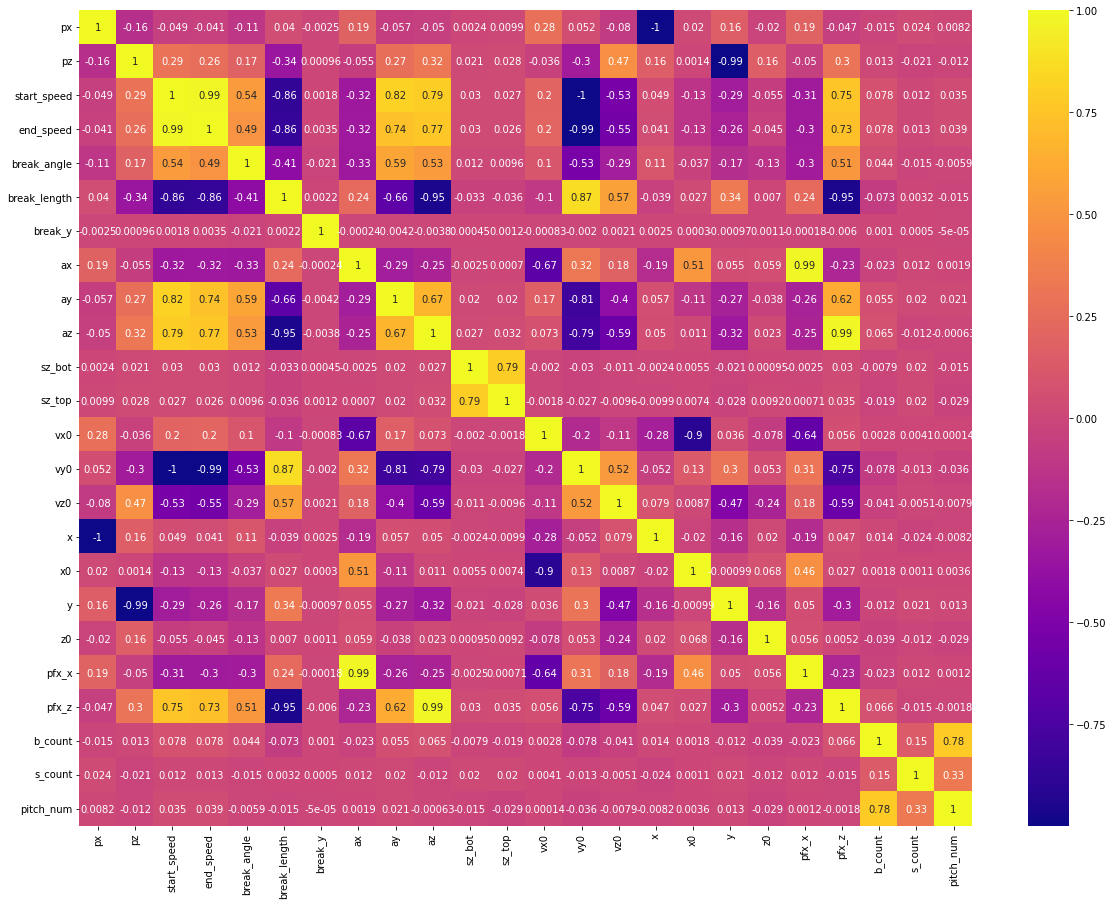

In [ ]:
fig, ax = plt.subplots(figsize=(20,15))
corr = sns.heatmap(data.corr(), ax=ax, cmap='plasma', annot=True)

In [ ]:
# Randomize dataframe

data.sample(frac=1)

,pitch_type,px,pz,start_speed,end_speed,break_angle,break_length,break_y,ax,ay,...,vz0,x,x0,y,z0,pfx_x,pfx_z,b_count,s_count,pitch_num
381153,Slider,1.13,2.98,82.9,77.2,9.6,8.4,24.0,4.67,20.89,...,-0.64,73.80,-1.69,158.38,6.02,3.12,0.24,0.0,0.0,2.0
170792,Slider,0.85,1.54,86.7,80.7,0.0,7.2,24.0,-1.62,22.50,...,-4.58,84.47,-3.09,197.26,5.46,-1.00,3.67,0.0,0.0,1.0
581484,Four-seam Fastball,-1.22,1.67,93.6,86.4,37.2,4.8,24.0,-12.75,27.94,...,-8.22,163.34,-0.96,193.54,5.74,-6.74,9.16,3.0,0.0,9.0
345644,Four-seam Fastball,0.26,2.45,92.0,85.0,28.8,3.6,24.0,-10.37,25.44,...,-5.40,107.28,-1.83,172.50,5.57,-5.66,9.30,2.0,0.0,3.0
554716,Four-seam Fastball,0.64,3.74,93.8,85.7,15.6,3.6,24.0,5.14,29.83,...,-4.00,92.59,1.69,137.74,6.28,2.73,8.99,2.0,1.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588087,Four-seam Fastball,0.35,2.29,93.4,86.7,21.6,3.6,24.0,-6.34,25.26,...,-6.55,103.70,-1.29,176.96,5.56,-3.33,10.42,1.0,1.0,4.0
310560,Four-seam Fastball,0.59,2.33,95.7,87.5,39.6,3.6,24.0,-12.08,30.89,...,-7.29,94.57,-1.66,175.80,5.70,-6.17,11.00,2.0,0.0,3.0
385846,Slider,1.68,0.21,85.5,79.9,4.8,9.6,24.0,1.75,23.15,...,-7.96,53.04,-1.73,233.07,6.30,1.11,-1.49,1.0,0.0,4.0
94117,Knuckle Curve,0.91,0.77,82.1,76.7,9.6,10.8,24.0,5.73,21.39,...,-4.10,82.46,-1.79,218.09,5.98,3.94,-4.66,0.0,0.0,3.0


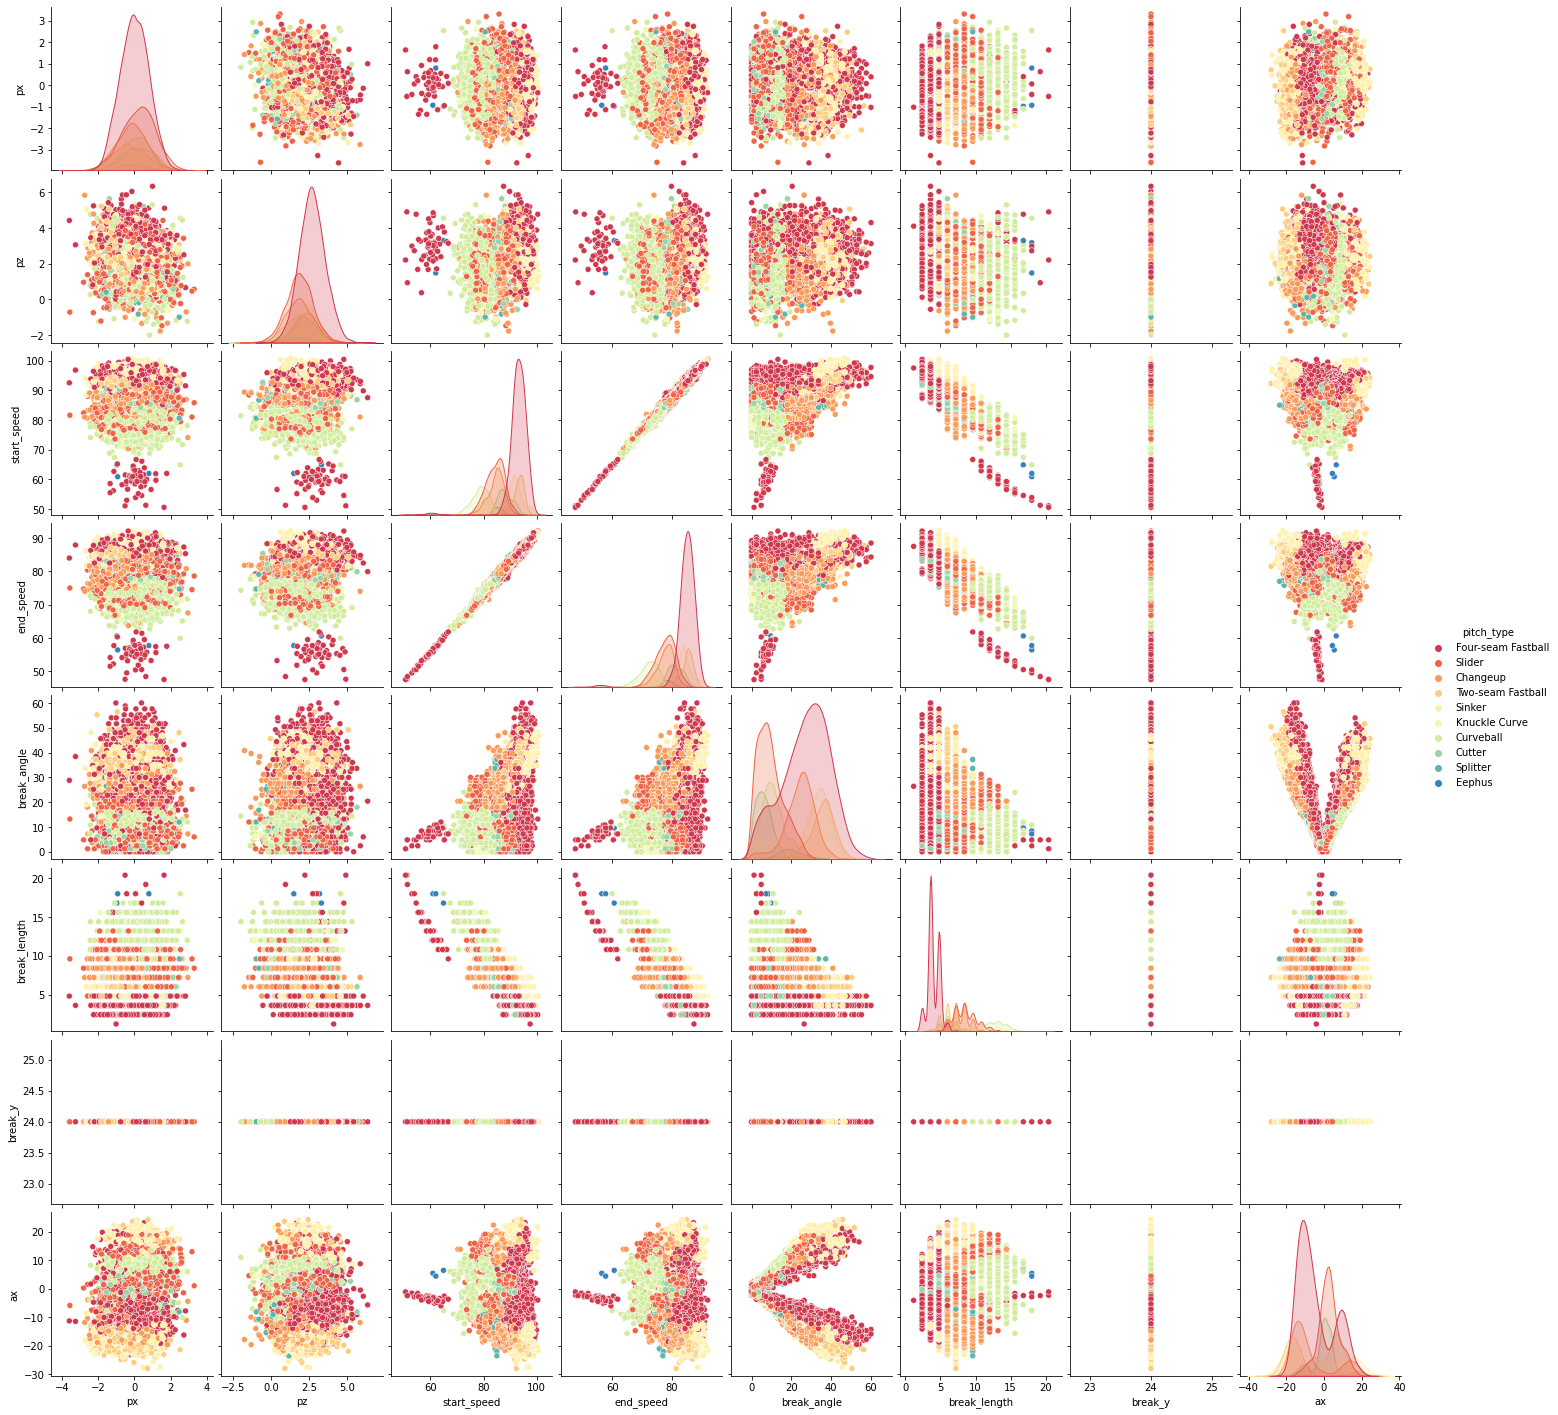

In [ ]:
# First set of features
df_A = data.iloc[0:10000, 0:9]

sns.pairplot(df_A, hue='pitch_type', palette="Spectral")

In [ ]:
# Second set of features
df_B = data.iloc[0:10000, 9:18]

# Append target class to second set
pitches = data["pitch_type"].iloc[0:10000]
df_B = df_B.join(pitches)

sns.pairplot(df_B, hue='pitch_type', palette="Spectral")

Output hidden; open in https://colab.research.google.com to view.

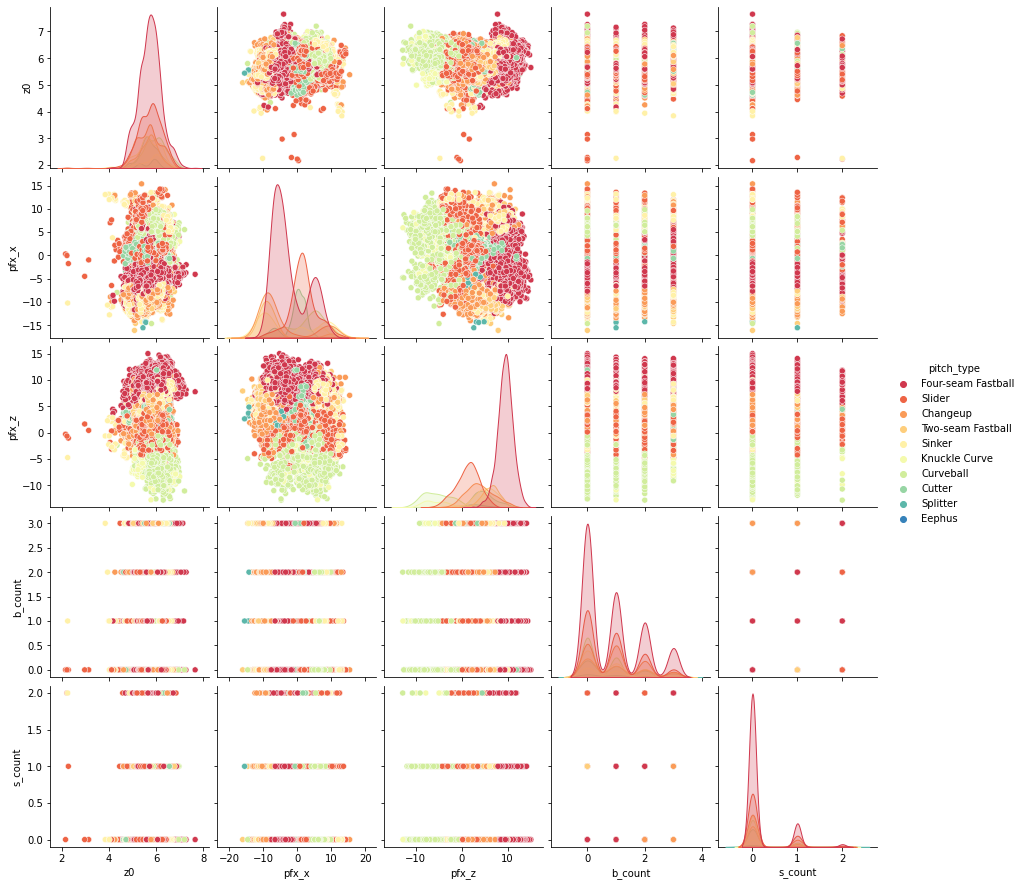

In [ ]:
# Third set of features
df_C = data.iloc[0:10000, 19:25]

# Append target class to third set
pitches = data["pitch_type"].iloc[0:10000]
df_C = df_C.join(pitches)

sns.pairplot(df_C, hue='pitch_type', palette="Spectral")

# Encode Target and Categorical features

In [7]:
# Encode target variable
le = LabelEncoder()

data.pitch_type = le.fit_transform(data.pitch_type)
data

,pitch_type,px,pz,start_speed,end_speed,break_angle,break_length,break_y,ax,ay,...,vz0,x,x0,y,z0,pfx_x,pfx_z,b_count,s_count,pitch_num
0,4,0.00,2.15,88.8,80.7,22.8,4.8,24.0,-8.47,28.90,...,-6.89,116.97,-1.42,180.81,6.07,-5.07,9.98,0.0,0.0,1.0
1,4,0.34,2.31,89.9,81.8,22.8,3.6,24.0,-7.10,28.85,...,-7.48,103.93,-1.02,176.34,6.20,-4.14,11.18,0.0,0.0,1.0
2,9,-0.05,2.03,85.7,79.6,9.6,6.0,24.0,3.65,22.07,...,-5.98,118.86,-1.29,183.96,6.30,2.30,5.99,0.0,0.0,2.0
3,0,0.49,0.92,85.4,78.5,24.0,7.2,24.0,-13.77,24.44,...,-6.78,98.15,-1.56,214.03,5.85,-8.87,4.14,0.0,1.0,3.0
4,0,-0.13,1.11,84.6,77.6,26.4,8.4,24.0,-15.99,24.56,...,-5.73,121.81,-1.57,208.77,5.89,-10.51,2.51,1.0,1.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
728785,4,0.30,1.99,95.8,87.3,40.8,3.6,24.0,-13.45,31.72,...,-8.04,105.36,-2.04,184.97,5.69,-6.90,10.64,2.0,0.0,4.0
728786,9,1.00,-0.38,87.2,80.3,7.2,7.2,24.0,-5.16,26.14,...,-9.25,79.01,-2.16,249.03,5.53,-3.20,3.00,0.0,0.0,1.0
728787,4,0.36,2.02,95.0,86.6,33.6,3.6,24.0,-10.91,30.97,...,-7.80,103.36,-2.05,184.22,5.68,-5.68,10.65,1.0,0.0,2.0
728788,9,-0.26,2.60,84.0,75.3,2.4,8.4,24.0,-2.69,29.26,...,-1.44,127.02,-2.14,168.51,5.87,-1.84,1.31,1.0,0.0,3.0


# Split dataset for training

In [8]:
X = data.drop(['pitch_type'], axis = 1)
y = data['pitch_type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
print('-------------\nTraining Data \n-------------')
print(f'Features: {X_train.shape}')
print(f'Target:   {y_train.shape}\n')

print('-------------\nTesting Data \n-------------')
print(f'Features: {X_test.shape}')
print(f'Target:   {y_test.shape}')

-------------
Training Data 
-------------
Features: (575993, 24)
Target:   (575993,)

-------------
Testing Data 
-------------
Features: (143999, 24)
Target:   (143999,)


In [ ]:
np.unique(y_train)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

# Feature Selection

## Univariate Statistical Tests

In [ ]:
# feature extraction
test = SelectKBest(score_func=f_classif, k=4)
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=3)
print(f'Fit Scores: \n{fit.scores_}\n')
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

Fit Scores: 
[  24.246   37.899   13.271  256.561  721.188   24.469    9.68    87.496
 2475.446 1196.852  343.606]

[[ 21.3  18.4  60.  217. ]
 [ 15.7  16.3  53.  229. ]
 [ 20.1  12.   49.  181. ]
 [ 18.4  15.2  53.  219. ]
 [ 17.1  27.1  45.  217. ]]


## Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression(solver='lbfgs')
rfe = RFE(model)
fit = rfe.fit(X, y)
print("Num Features: %d" % fit.n_features_)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)

## Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA

# feature extraction
pca = PCA(n_components=10)
X_pca = pca.fit(X)

# summarize components
print("Explained Variance: %s" % X_pca.explained_variance_ratio_)
print(X_pca.components_)

Explained Variance: [0.694 0.122 0.051 0.047 0.027 0.019 0.017 0.012 0.008 0.003]
[[ 0.146  0.008 -0.138 -0.143  0.112 -0.029 -0.06  -0.19  -0.003 -0.257
  -0.905]
 [-0.376  0.009 -0.093 -0.294 -0.054 -0.442 -0.708 -0.16   0.109  0.153
   0.044]
 [-0.41   0.013 -0.221 -0.454 -0.034  0.312  0.423 -0.234  0.337  0.358
  -0.057]
 [-0.693 -0.002  0.242  0.495  0.165  0.063  0.033  0.116 -0.248  0.171
  -0.283]
 [ 0.329 -0.005  0.112  0.189 -0.155 -0.176 -0.031  0.324  0.357  0.693
  -0.272]
 [-0.058  0.013 -0.057  0.341  0.354  0.213 -0.202 -0.006  0.759 -0.29
   0.077]
 [ 0.127 -0.004  0.002 -0.077 -0.046  0.784 -0.522  0.046 -0.212  0.203
  -0.03 ]
 [-0.207 -0.007  0.426 -0.231 -0.584  0.1   -0.011  0.406  0.235 -0.371
  -0.117]
 [ 0.121  0.002  0.596  0.144 -0.193  0.028 -0.004 -0.746  0.093  0.077
   0.016]
 [ 0.067  0.01   0.559 -0.457  0.652 -0.036  0.02   0.204 -0.014  0.06
   0.019]]


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import decomposition

np.random.seed(5)

fig = plt.figure()
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])

plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("A", 0), ("B", 1), ("C", 2),("D", 3)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0, 3]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()

## Feature Importance

In [ ]:
from sklearn import datasets
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(X, y)

# display the relative importance of each attribute
print(model.feature_importances_)

[0.34  0.316 0.345]


# Supervised Learning Models

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

dct = DecisionTreeClassifier(random_state=1234)
dct.fit(X_train,y_train)

y_pred_dct = dct.predict(X_test)

print(f"The accuracy score for Decision Tree is {(accuracy_score(y_test,y_pred_dct)*100).round(2)} %")

The accuracy score for Decision Tree is 78.55 %


In [ ]:
# https://mljar.com/blog/visualize-decision-tree/
from sklearn import tree
text_representation = tree.export_text(dct)
print(text_representation)

with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(25,20))

plot_tree(dct, filled=True, max_depth=3)
plt.title("Decision tree trained on all the iris features")
plt.show()

In [ ]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dct, 
                   feature_names=data.feature_names,  
                   class_names=data.target_names,
                   filled=True)

In [ ]:
X.columns

Index(['age', 'gender', 'height_cm', 'weight_kg', 'body fat_%', 'diastolic',
       'systolic', 'gripForce', 'sit and bend forward_cm', 'sit-ups counts',
       'broad jump_cm'],
      dtype='object')

In [ ]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(dct, out_file=None, 
                                feature_names=X.columns,  
                                class_names=data.columns[11],
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

In [ ]:
!pip install dtreeviz

In [ ]:
from dtreeviz.trees import dtreeviz # remember to load the package

viz = dtreeviz(dct, X, y,
                target_name="category",
                feature_names=X.columns,
                class_names=list(np.unique(y)))

viz

## Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier

# limit number of trainable observations for quicker computation
limit = 50000

rf_Xtrain = X_train[:limit]
rf_ytrain = y_train[:limit]
rf_Xtest = X_test[:limit]
rf_ytest = y_test[:limit]

rf = RandomForestClassifier(n_estimators=1000)
rf.fit(rf_Xtrain, rf_ytrain)

y_pred_rf = rf.predict(rf_Xtest)
accuracy_score(rf_ytest, y_pred_rf)

print(f"The accuracy score for Random Forest is {(accuracy_score(rf_ytest, y_pred_rf)*100).round(2)} %")

The accuracy score for Random Forest is 81.34 %


In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(15, 10))

plot_tree(rf.estimators_[0], 
          feature_names = X.columns,
          class_names = data.columns[11], 
          filled=True, 
          impurity=True, 
          rounded=True)

In [ ]:
!pip install dtreeviz

In [ ]:
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from dtreeviz.trees import dtreeviz

viz = dtreeviz(rf.estimators_[99], X, y,
               target_name = "category",
               feature_names = X.columns,
               class_names = list(data.columns[11]),
               title = "100th decision tree - Wine data")




viz.save("decision_tree.svg")

# from google.colab import files
# files.download("decision_tree.svg")

In [ ]:
from google.colab import files
files.download("decision_tree.svg")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## k-Nearest Neighbors (kNN)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=7,metric='minkowski',p=2)
knn_model.fit(X_train,y_train)

y_pred_knn = knn_model.predict(X_test)
accuracy_score(y_test,y_pred_knn)

print(f"The accuracy score for k-Nearest Neighbors is {(accuracy_score(y_test,y_pred_knn)*100).round(2)} %")

The accuracy score for k-Nearest Neighbors is 81.66 %


## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)
accuracy_score(y_test, y_pred_nb)

print(f"The accuracy score for Naive Bayes is {(accuracy_score(y_test,y_pred_nb)*100).round(2)} %")

The accuracy score for Naive Bayes is 65.11 %


## Support Vector Machine (SVM)

In [ ]:
from sklearn.svm import SVC

svc_model = SVC()
svc_model.fit(X_train, y_train)

y_pred_svc = svc_model.predict(X_test)
accuracy_score(y_test, y_pred_svc)

print(f"The accuracy score for SVM is {(accuracy_score(y_test,y_pred_svc)*100).round(2)} %")

# XGBoost

In [19]:
!pip install --upgrade xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 255.9 MB 36 kB/s 
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [20]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# fit model no training data
xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)

print(xgb_model)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)


In [21]:
# make predictions for test data
y_pred = xgb_model.predict(X_test)
predictions = [round(value) for value in y_pred]

# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.40%


## Neural Network Classification

In [ ]:
# Implement your code here
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from tensorflow.keras.optimizers import SGD

# Stochastic Logistic Regression
model = Sequential()

model.add(Dense(units=512, input_shape=[X_train.shape[1]], activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=12, activation='sigmoid'))

# Compile model
sgd = SGD(learning_rate=0.01)
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 512)               12800     
                                                                 
 dense_9 (Dense)             (None, 256)               131328    
                                                                 
 dense_10 (Dense)            (None, 128)               32896     
                                                                 
 dense_11 (Dense)            (None, 12)                1548      
                                                                 
Total params: 178,572
Trainable params: 178,572
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
history = model.fit(
    X_train, 
    y_train, 
    batch_size = 256,
    epochs = 75, 
    verbose=1, 
    validation_data=(X_test, y_test)
)

Epoch 1/75
2250/2250 [==============================] - 6s 3ms/step - loss: 0.6615 - accuracy: 0.7536 - val_loss: 0.5757 - val_accuracy: 0.7781
Epoch 2/75
2250/2250 [==============================] - 6s 3ms/step - loss: 0.5713 - accuracy: 0.7780 - val_loss: 0.5633 - val_accuracy: 0.7827
Epoch 3/75
2250/2250 [==============================] - 6s 3ms/step - loss: 0.5529 - accuracy: 0.7840 - val_loss: 0.5391 - val_accuracy: 0.7894
Epoch 4/75
2250/2250 [==============================] - 6s 3ms/step - loss: 0.5408 - accuracy: 0.7885 - val_loss: 0.5305 - val_accuracy: 0.7921
Epoch 5/75
2250/2250 [==============================] - 6s 3ms/step - loss: 0.5309 - accuracy: 0.7918 - val_loss: 0.5290 - val_accuracy: 0.7911
Epoch 6/75
2250/2250 [==============================] - 6s 3ms/step - loss: 0.5235 - accuracy: 0.7951 - val_loss: 0.5106 - val_accuracy: 0.8004
Epoch 7/75
2250/2250 [==============================] - 6s 3ms/step - loss: 0.5170 - accuracy: 0.7979 - val_loss: 0.5116 - val_accuracy:

Loss after final iteration:  0.3980337977409363
Training loss after final iteration:  0.391243040561676


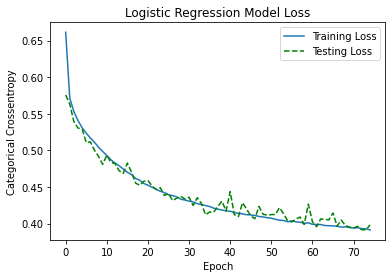

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

print("Loss after final iteration: ", history.history['val_loss'][-1])
print("Training loss after final iteration: ", history.history['loss'][-1])

fig = plt.figure(figsize=(6,4))
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'], 'g--')
plt.title('Logistic Regression Model Loss')

plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Testing Loss'], loc='upper right')
plt.show()

<BarContainer object of 24 artists>

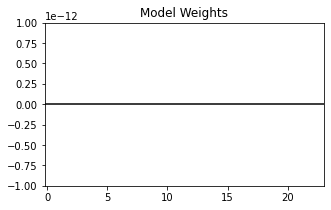

In [ ]:
fig = plt.figure(figsize=(5,3))
ax = fig.gca()
plt.plot([-0.2,23],[0,0],color='k')
plt.xlim([-0.2,23])
plt.title('Model Weights')

Temp=model.get_weights()[0].T
plt.bar(range(len(Temp[0])),Temp[0])

In [ ]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

def ohe_to_classes(y):
    '''
        converts one hot encoding to classes
        y: a list of one-hot-encoded classes of data points
    '''
    return [np.argmax(v) for v in y]


predicted_all1 = model.predict(np.array(X_test))
predicted_all = np.argmax(predicted_all1, axis=1)
print("predicted classes: {}".format(predicted_all))


print('accuracy', accuracy_score(predicted_all, y_test))

predicted classes: [4 9 0 ... 1 4 4]
accuracy 0.8497003451412857


In [ ]:
confusion_mat = confusion_matrix(predicted_all, y_test)
print("confusion matrix\n{}\n\n".format(confusion_mat))

confusion matrix
[[14245    48     0    31    83     1     0     0   350    73   648   353]
 [   24 10825     6    18    13  1014     5     0     2  1181    16     1]
 [    0     0     4     0     0     0     0     0     0     0     0     0]
 [   58    15     0  5921   429     1     0     0     2  1108    23     4]
 [  148     5     0   611 49813     0     0     0  1178   118    20  1510]
 [    2   512     0     8     0  1825     0     0     0   254     2     0]
 [    2     4     0     0     1     0    28     0     0     4     0     0]
 [    0     0     0     0     0     0     0     8     0     0     1     0]
 [  387     1     0     4   355     0     0     0  7100    17    26  1598]
 [  143  1225     0  2646   138   205     1     0     5 22748   177     9]
 [  484     3     0     2     1     0     0     0     8    52  1162    11]
 [  494     0     0     3  1375     0     0     0  2362     5    19  8677]]




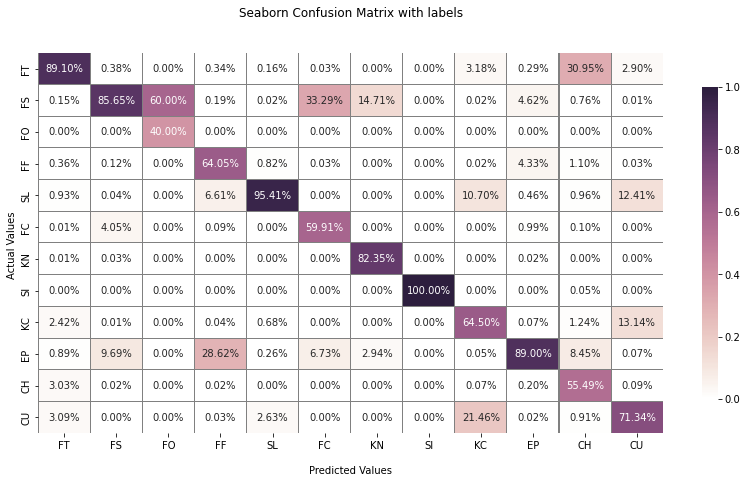

In [ ]:
import seaborn as sns

df_cm = pd.DataFrame(confusion_mat)



plt.figure(figsize = (14,7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
ax = sns.heatmap(df_cm/np.sum(df_cm), annot=True, vmin=0.0, vmax=1.0, 
                  fmt='.2%', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidth=0.1, linecolor='gray')

ax.xaxis.set_ticklabels(['FT', 'FS', 'FO', 'FF', 'SL', 'FC', 'KN', 'SI', 'KC', 'EP', 'CH', 'CU'])
ax.yaxis.set_ticklabels(['FT', 'FS', 'FO', 'FF', 'SL', 'FC', 'KN', 'SI', 'KC', 'EP', 'CH', 'CU'])

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

plt.show()

## Neural Network model 2

In [ ]:
# Implement your code here
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.regularizers import l2, l1
from tensorflow.keras.optimizers import SGD

# Stochastic Logistic Regression
model = Sequential()

model.add(Dense(units=512, input_shape=[X_train.shape[1]], activation='relu', kernel_regularizer=l2(0.001)))
model.add(Dense(units=256, activation='relu'))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=12, activation='softmax'))

# Compile model
sgd = SGD(learning_rate=0.01)
model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 512)               12800     
                                                                 
 dense_18 (Dense)            (None, 256)               131328    
                                                                 
 dense_19 (Dense)            (None, 128)               32896     
                                                                 
 dense_20 (Dense)            (None, 12)                1548      
                                                                 
Total params: 178,572
Trainable params: 178,572
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit the model
history = model.fit(
    X_train, 
    y_train, 
    batch_size = 256,
    epochs = 75, 
    verbose=1, 
    validation_data=(X_test, y_test)
)

Epoch 1/75
2250/2250 [==============================] - 6s 3ms/step - loss: 0.6686 - accuracy: 0.7513 - val_loss: 0.5790 - val_accuracy: 0.7752
Epoch 2/75
2250/2250 [==============================] - 6s 3ms/step - loss: 0.5752 - accuracy: 0.7762 - val_loss: 0.5584 - val_accuracy: 0.7819
Epoch 3/75
2250/2250 [==============================] - 6s 3ms/step - loss: 0.5567 - accuracy: 0.7818 - val_loss: 0.5403 - val_accuracy: 0.7889
Epoch 4/75
2250/2250 [==============================] - 6s 3ms/step - loss: 0.5452 - accuracy: 0.7853 - val_loss: 0.5423 - val_accuracy: 0.7882
Epoch 5/75
2250/2250 [==============================] - 6s 3ms/step - loss: 0.5342 - accuracy: 0.7906 - val_loss: 0.5433 - val_accuracy: 0.7878
Epoch 6/75
2250/2250 [==============================] - 6s 3ms/step - loss: 0.5251 - accuracy: 0.7942 - val_loss: 0.5139 - val_accuracy: 0.7999
Epoch 7/75
2250/2250 [==============================] - 6s 3ms/step - loss: 0.5169 - accuracy: 0.7987 - val_loss: 0.5039 - val_accuracy:

In [ ]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

def ohe_to_classes(y):
    '''
        converts one hot encoding to classes
        y: a list of one-hot-encoded classes of data points
    '''
    return [np.argmax(v) for v in y]


predicted_all1 = model.predict(np.array(X_test))
predicted_all = np.argmax(predicted_all1, axis=1)
print("predicted classes: {}".format(predicted_all))


print('accuracy', accuracy_score(predicted_all, y_test))

predicted classes: [4 9 0 ... 1 4 4]
accuracy 0.8554642740574587


In [ ]:
confusion_mat = confusion_matrix(predicted_all, y_test)
print("confusion matrix\n{}\n\n".format(confusion_mat))

confusion matrix
[[14657    41     0    43    71     1     1     0   485    66   791   513]
 [   26 10771     2    21    10   945     4     0     0   927     7     1]
 [    0     1     8     0     0     0     0     0     0     0     0     0]
 [   42     5     0  6232   573     3     0     0     4  1183    17     7]
 [  166    20     0   537 50182     0     0     0  1251   115    22  1874]
 [    2   473     0     9     0  1831     0     0     0   150     1     0]
 [    4     5     0     0     0     0    28     0     0     2     0     0]
 [    1     0     0     0     0     0     0     4     0     0     0     0]
 [  334     0     0     1   385     0     0     0  6963    16    17  1336]
 [  169  1318     0  2390   106   265     1     0     5 23059   195     8]
 [  293     4     0     9     1     1     0     4     8    39  1035     8]
 [  293     0     0     2   880     0     0     0  2291     3     9  8416]]




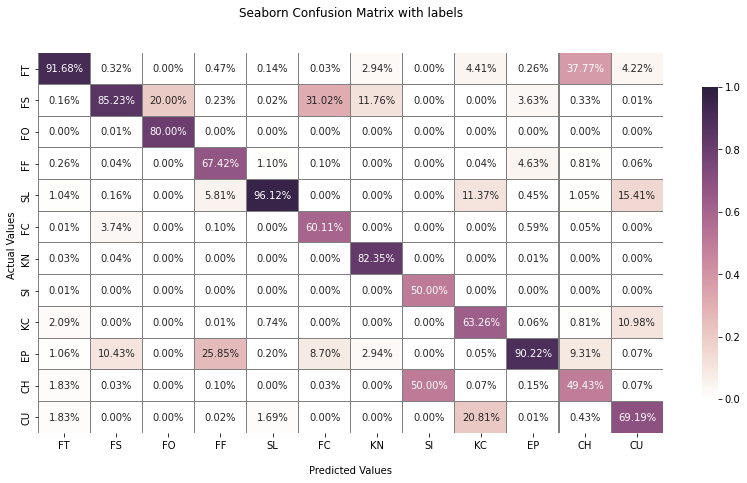

In [ ]:
import seaborn as sns

df_cm = pd.DataFrame(confusion_mat)



plt.figure(figsize = (14,7))
cmap = sns.cubehelix_palette(light=1, as_cmap=True)
ax = sns.heatmap(df_cm/np.sum(df_cm), annot=True, vmin=0.0, vmax=1.0, 
                  fmt='.2%', cmap=cmap, cbar_kws={"shrink": .82},
                  linewidth=0.1, linecolor='gray')

ax.xaxis.set_ticklabels(['FT', 'FS', 'FO', 'FF', 'SL', 'FC', 'KN', 'SI', 'KC', 'EP', 'CH', 'CU'])
ax.yaxis.set_ticklabels(['FT', 'FS', 'FO', 'FF', 'SL', 'FC', 'KN', 'SI', 'KC', 'EP', 'CH', 'CU'])

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ')

plt.show()

## Deep Replay

In [ ]:
!pip install deepreplay

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.initializers import glorot_normal, glorot_uniform, he_normal, he_uniform
from keras.layers import Dense
from keras.models import Sequential
from deepreplay.callbacks import ReplayData
from deepreplay.datasets.ball import load_data
from deepreplay.plot import compose_plots, compose_animations
from deepreplay.replay import Replay

from matplotlib import pyplot as plt

plt.rcParams['animation.ffmpeg_path'] = '/usr/bin/ffmpeg'

X, y = X, y

activation = 'relu'
initializer_name = 'he_uniform'
initializer = eval(initializer_name)(seed=13)
title = 'Activation: ReLU - Initializer: {}'.format(initializer_name)
group_name = 'relu_{}'.format(initializer_name)
filename = f'{group_name}_{initializer_name}_{activation}_weight_initializers.h5'

# Model builder function
def build_model(n_layers, input_dim, units, activation, initializer):
    if isinstance(units, list):
        assert len(units) == n_layers
    else:
        units = [units] * n_layers

    model = Sequential()
    # Adds first hidden layer with input_dim parameter
    model.add(Dense(units=units[0],
                    input_dim=input_dim,
                    activation=activation,
                    kernel_initializer=initializer,
                    name='h1'))

    # Adds remaining hidden layers
    for i in range(2, n_layers + 1):
        model.add(Dense(units=units[i-1],
                        activation=activation,
                        kernel_initializer=initializer,
                        name='h{}'.format(i)))

    # Adds output layer
    model.add(Dense(units=1, activation='sigmoid', kernel_initializer=initializer, name='o'))
    # Compiles the model
    model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['acc'])
    return model


replaydata = ReplayData(X, y, filename=filename, group_name=group_name)

# Create the MLP model with 5 layers within 10 input neurons and 100 unists in hidden and output layers
model = build_model(n_layers=5, input_dim=23, units=100, activation=activation, initializer=initializer)

# fit the model over 10 epochs with batch size of 16
model.fit(X, y, epochs=10, batch_size=256, callbacks=[replaydata])

# Plot the results
replay = Replay(replay_filename=filename, group_name=group_name)

fig = plt.figure(figsize=(12, 6))
ax_zvalues = plt.subplot2grid((2, 2), (0, 0))
ax_weights = plt.subplot2grid((2, 2), (0, 1))
ax_activations = plt.subplot2grid((2, 2), (1, 0))
ax_gradients = plt.subplot2grid((2, 2), (1, 1))

wv = replay.build_weights(ax_weights)
gv = replay.build_gradients(ax_gradients)

# Z-values
zv = replay.build_outputs(ax_zvalues, before_activation=True,
                          exclude_outputs=True, include_inputs=False)
# Activations
av = replay.build_outputs(ax_activations, exclude_outputs=True, include_inputs=False)

# Save plots
fig = compose_plots([zv, wv, av, gv], epoch=0, title=title)
fig.savefig('part2.png', format='png', dpi=120)

# Animate & save mp4
sample_anim = compose_animations([zv, wv, av, gv])
sample_anim.save('part2.mp4', dpi=120, fps=5)

KeyError: ignored

## Keras Tuner Hyperband

In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 135 kB 4.2 MB/s 
     |████████████████████████████████| 1.6 MB 32.7 MB/s 


In [ ]:
y.nunique()

12

In [ ]:
import tensorflow as tf
from tensorflow import keras, lite
from tensorflow.keras.layers import Dense, Dropout, Flatten, ConvLSTM2D, LSTM, RepeatVector
import keras_tuner as kt

# Set a global random seed for a better random result
tf.random.set_seed(42)

# Build the model by assigning
# the number of layers and number of neurons for each layer
# the learning rate
# the number of epochs
# ------------------------------------------------------------------------
# To get these optimal parameters I will use the Keras Tuner library
# so it will get the optimal parameters for the NN
# and pass it to the model_builder function
def model_builder(hp):
    model = tf.keras.Sequential()

    model.add(Dense(hp.Int('input_unit', min_value=32, max_value=512, step=32), input_shape=[X_train.shape[1]]))
        
    for i in range(hp.Int('n_layers', 1, 5)):
        model.add(Dense(hp.Int(f'dense_{i}_units', min_value=32, max_value=512, step=32)))

    model.add(Dropout(hp.Float('dropout_rate', min_value=0, max_value=0.5, step=0.1)))

    model.add(Dense(y.nunique(), activation='softmax'))
    

    # Tune the learning rate for the optimizer
    # Choose an optimal value from 0.1, 0.01, 0.001, or 0.0001
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3, 1e-4])

    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),
        metrics=[
            tf.keras.metrics.SparseCategoricalAccuracy(name='accuracy'),
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
        ]
    )

    return model



# To be able to get the optimal parameters for our network
# we have to create a Tuner with the following setup
# 'objective' -> will use to create test models
# 'max_epochs' -> the maximum number of epochs to train one model
# 'factor' -> the reduction factor for the number of epochs and number of models for each bracket
# 'directory' -> will save the training history there
tuner = kt.Hyperband(model_builder,
                     objective='val_accuracy',
                     max_epochs=50,
                     factor=3,
                     directory='lstm_dir',
                     project_name='MLB_Pitches')



# Define an event that will stop the training
# depending of the value of "val_loss"
# ------------------------------------------------------------------
# Will stop training if the "val_loss" hasn't improved in 5 epochs.
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)



# The algorithm trains a large number of models for a few epochs and 
# carries forward only the top-performing half of models to the next round.
tuner.search(
        x=X_train,
        y=y_train,
        epochs=50,
        validation_data=(X_test, y_test),
        callbacks=[stop_early], 
        shuffle=True
)


Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
416               |?                 |input_unit
4                 |?                 |n_layers
288               |?                 |dense_0_units
0.1               |?                 |dropout_rate
0.01              |?                 |learning_rate
2                 |?                 |tuner/epochs
0                 |?                 |tuner/initial_epoch
3                 |?                 |tuner/bracket
0                 |?                 |tuner/round

Epoch 1/2


ValueError: ignored

In [ ]:
# Get best hyperparameters that were found during the search
best_model = tuner.get_best_models()[0]
best_params = tuner.get_best_hyperparameters(num_trials=1)[0]

best_params.values

In [ ]:
best_model.summary()

In [ ]:
# Get the metrics for our trained model
eval_result = best_model.evaluate(X_test, y_test)

In [ ]:
# Get the predictions
y_pred=best_model.predict(x=X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(actual_y_test, y_pred)


disp = ConfusionMatrixDisplay.from_predictions(actual_y_test, y_pred, display_labels=classes)

plt.rcParams['figure.figsize'] = [20, 10]
plt.show()

## TabNet

In [ ]:
!pip install pytorch_tabnet

In [ ]:
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, accuracy_score

# define the model
clf1_nopreproc = TabNetClassifier(optimizer_fn = torch.optim.Adam,
                       optimizer_params = dict(lr=2e-2),
                       scheduler_params = {"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn = torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' # "sparsemax"
                      )

# fit the model 
clf1_nopreproc.fit(
    X_train,y_train,
    eval_set = [(X_train, y_train), (X_test, y_test)],
    eval_name = ['train', 'valid'],
    eval_metric = ['accuracy'],
    max_epochs = 100 , patience = 25,
    batch_size = 256, virtual_batch_size = 128,
    num_workers = 0,
    weights = 1,
    drop_last = False
)   

Device used : cuda
epoch 0  | loss: 0.66166 | train_accuracy: 0.69385 | valid_accuracy: 0.69357 |  0:01:13s
epoch 1  | loss: 0.55869 | train_accuracy: 0.71335 | valid_accuracy: 0.71469 |  0:02:25s
epoch 2  | loss: 0.53154 | train_accuracy: 0.72251 | valid_accuracy: 0.72346 |  0:03:37s
epoch 3  | loss: 0.51607 | train_accuracy: 0.74919 | valid_accuracy: 0.7491  |  0:04:50s
epoch 4  | loss: 0.50455 | train_accuracy: 0.71111 | valid_accuracy: 0.71063 |  0:06:02s
epoch 5  | loss: 0.49919 | train_accuracy: 0.7345  | valid_accuracy: 0.73437 |  0:07:14s
epoch 6  | loss: 0.49264 | train_accuracy: 0.76405 | valid_accuracy: 0.76403 |  0:08:26s


KeyboardInterrupt: ignored

BEST ACCURACY SCORE ON VALIDATION SET : 0.7543859649122807
BEST ACCURACY SCORE ON TEST SET : 0.7543859649122807


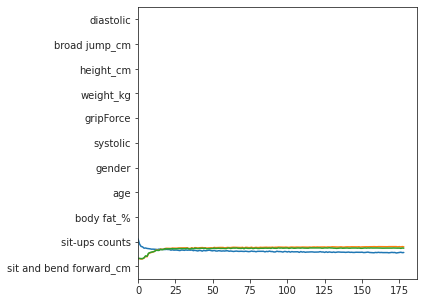

In [ ]:
# plot losses
plt.plot(clf1_nopreproc.history['loss'])

# plot accuracy
plt.plot(clf1_nopreproc.history['train_accuracy'])
plt.plot(clf1_nopreproc.history['valid_accuracy'])

# find and plot feature importance
y_pred = clf1_nopreproc.predict(X_test)
clf1_nopreproc.feature_importances_
feat_importances = pd.Series(clf1_nopreproc.feature_importances_, index=data.iloc[:,:11].columns)
feat_importances.nlargest(20).plot(kind='barh')


# determine best accuracy for test set
preds = clf1_nopreproc.predict(X_test)
test_acc = accuracy_score(preds, y_test)

# determine best accuracy for validation set
preds_valid = clf1_nopreproc.predict(X_test)
valid_acc = accuracy_score(preds_valid, y_test)

print(f"BEST ACCURACY SCORE ON VALIDATION SET : {valid_acc}")
print(f"BEST ACCURACY SCORE ON TEST SET : {test_acc}")